In [1]:
import pandas as pd
import networkx as nx
import pyvis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def make_df_from_tournament(tournament_url, npages, string):
    
    ''' This function realizes a dataframe from a single tournament url that has many rounds in different pages 
        
        ETER_PARAMETERS:
        
            (string) tournament_url : url of the tournament in html or csv;
            
            (int) npages : number of pages the tournament has inside which there are all matches;
            
            (string) string : string added by default on tournament url in the searchbar by the browser when you change 
                              page to get other matches of the same tournament.
                              
        RETURNS:
        
            (pandas_object) df : pandas dataframe already concatenated.
            
    '''
    
    n_of_pages = np.arange(0, npages*100, 100) 
    # make sure the browser added 100 to the page number
    
    tournament_list = []
    for i in range(len(n_of_pages)):
        if i == 0:
            tournament_list.append(pd.DataFrame(pd.read_html(tournament_url)[3]))
        else:
            tournament_list.append(pd.DataFrame(pd.read_html(tournament_url + string + str(n_of_pages[i]))[1]))
    
    df = pd.concat(tournament_list)
    
    return df


def reading(list_of_t, npages, string_variable):
    
    ''' Function that scroll through each pages of the tournament in order to take track of each match
    
        ENTER PARAMETERS :
        
                    (list) list_of_t : is a list of tournaments;
                    
                    (int) npages : number of pages that tournament has;
                    
                    (str) string_variable : string to add to the url when you go from page 1 to 2, 3 and so on.
                    
        RETURNS :
                    (pandas_df) df_fin : final DataFrame already concatenated.
            
    '''
    
    for i in range(len(list_of_t)):
        df = make_df_from_tournament(list_of_t[i], npages[i], string)
        if i==0:
            df_fin = df
        else:
            df_fin=pd.concat([df_fin,df])
    return df_fin

tournament = ['https://www.365chess.com/tournaments/World_Rapid_Championships_2021_2021/44760']
n_pages = [11]
string = '/?p=1&start='

dataframe = reading(tournament, n_pages, string)
dataframe

,White,Black,Result,Round,Date,Opening,View
0,"Carlsen, M","Gagunashvili, M",1-0,1.10,"Dec 26, 2021","C77 Ruy Lopez, Morphy defence",NaN
1,"Moroni, L","Rapport, R",0-1,1.10,"Dec 26, 2021",A91 Dutch defence,NaN
2,"Wojtaszek, R","Michalik, P",½-½,1.11,"Dec 26, 2021","D35 Queen's Gambit Declined, 3...Nf6",NaN
3,"Petrosyan, M","Dubov, D",0-1,1.12,"Dec 26, 2021",D02 Queen's pawn game,NaN
4,"Salem, A","Yuffa, D",0-1,1.13,"Dec 26, 2021","E24 Nimzo-Indian, Saemisch variation",NaN
...,...,...,...,...,...,...,...
77,"Dvirnyy, D","Lopusiewicz, P",½-½,13.82,"Dec 28, 2021","C89 Ruy Lopez, Marshall counter-attack",NaN
78,"Lubczynski, R","Sadzikowski, D",½-½,13.83,"Dec 28, 2021","E08 Catalan, closed, 7.Qc2",NaN
79,"Toczek, G","Peng, L",0-1,13.84,"Dec 28, 2021","B90 Sicilian, Najdorf",NaN
80,"Blanco, C","Yunusov, M",½-½,13.85,"Dec 28, 2021","D11 Queen's Gambit Declined Slav, 3.Nf3",NaN


In [3]:
dataframe.drop('View', axis=True)

,White,Black,Result,Round,Date,Opening
0,"Carlsen, M","Gagunashvili, M",1-0,1.10,"Dec 26, 2021","C77 Ruy Lopez, Morphy defence"
1,"Moroni, L","Rapport, R",0-1,1.10,"Dec 26, 2021",A91 Dutch defence
2,"Wojtaszek, R","Michalik, P",½-½,1.11,"Dec 26, 2021","D35 Queen's Gambit Declined, 3...Nf6"
3,"Petrosyan, M","Dubov, D",0-1,1.12,"Dec 26, 2021",D02 Queen's pawn game
4,"Salem, A","Yuffa, D",0-1,1.13,"Dec 26, 2021","E24 Nimzo-Indian, Saemisch variation"
...,...,...,...,...,...,...
77,"Dvirnyy, D","Lopusiewicz, P",½-½,13.82,"Dec 28, 2021","C89 Ruy Lopez, Marshall counter-attack"
78,"Lubczynski, R","Sadzikowski, D",½-½,13.83,"Dec 28, 2021","E08 Catalan, closed, 7.Qc2"
79,"Toczek, G","Peng, L",0-1,13.84,"Dec 28, 2021","B90 Sicilian, Najdorf"
80,"Blanco, C","Yunusov, M",½-½,13.85,"Dec 28, 2021","D11 Queen's Gambit Declined Slav, 3.Nf3"


In [4]:
G = nx.from_pandas_edgelist(dataframe,
                           source='White',
                           target='Black',
                           edge_attr='Result',
                           create_using = nx.Graph())

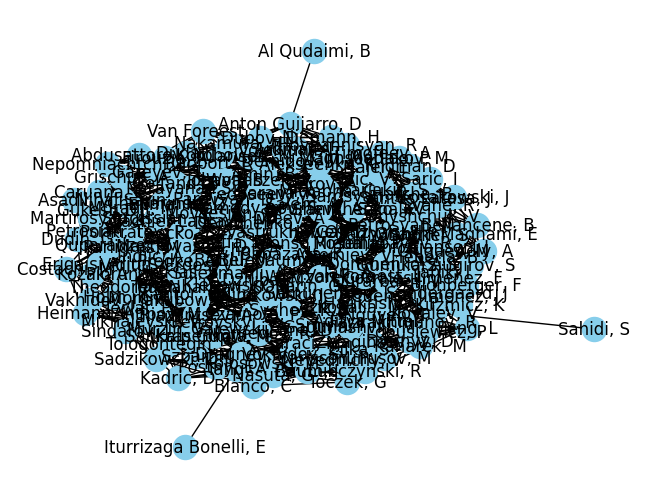

In [5]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)

In [6]:
from pyvis.network import Network
net = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222',
             font_color='white')

node_degree=dict(G.degree)

nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show("World Rapid Championship_2021.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [7]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'Carlsen, M': 0.07428571428571429,
 'Gagunashvili, M': 0.06857142857142857,
 'Moroni, L': 0.06857142857142857,
 'Rapport, R': 0.07428571428571429,
 'Wojtaszek, R': 0.07428571428571429,
 'Michalik, P': 0.07428571428571429,
 'Petrosyan, M': 0.07428571428571429,
 'Dubov, D': 0.07428571428571429,
 'Salem, A': 0.07428571428571429,
 'Yuffa, D': 0.07428571428571429,
 'Maghsoodloo, P': 0.07428571428571429,
 'Aronian, L': 0.07428571428571429,
 'Mamedyarov, S': 0.07428571428571429,
 'Czarnota, P': 0.07428571428571429,
 'Sanal, V': 0.06857142857142857,
 'Oparin, G': 0.06857142857142857,
 'Artemiev, V': 0.07428571428571429,
 'Shevchenko, K': 0.06857142857142857,
 'Lima, D': 0.07428571428571429,
 'Harikrishna, P': 0.06857142857142857,
 'Shirov, A': 0.07428571428571429,
 'Nihal Sarin,': 0.07428571428571429,
 'Donchenko, A': 0.07428571428571429,
 'Nakamura, H': 0.07428571428571429,
 'Gajewski, G': 0.06857142857142857,
 'Sargissian, G': 0.07428571428571429,
 'Fedoseev, V': 0.07428571428571429,
 'Nguy

<AxesSubplot: >

<Figure size 2000x3000 with 0 Axes>

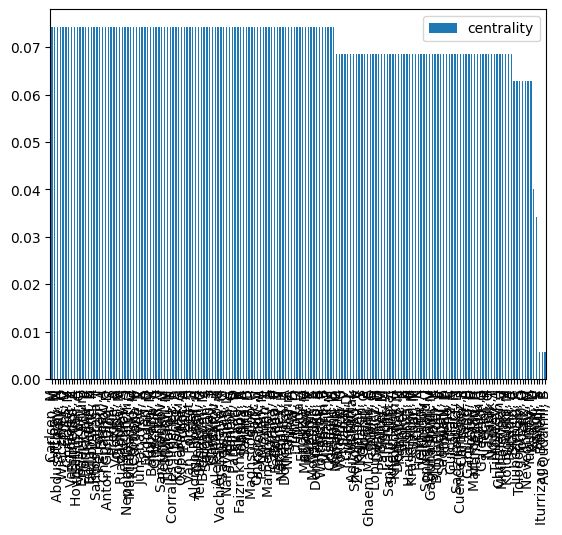

In [8]:
plt.figure(figsize=(20,30))
degree_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['centrality'])
degree_df.sort_values('centrality', ascending=False)[0:].plot(kind='bar')

In [9]:
import community as community_louvain
communities=community_louvain.best_partition(G)

In [10]:
communities

{'Carlsen, M': 0,
 'Gagunashvili, M': 4,
 'Moroni, L': 4,
 'Rapport, R': 0,
 'Wojtaszek, R': 2,
 'Michalik, P': 3,
 'Petrosyan, M': 4,
 'Dubov, D': 5,
 'Salem, A': 2,
 'Yuffa, D': 4,
 'Maghsoodloo, P': 6,
 'Aronian, L': 0,
 'Mamedyarov, S': 6,
 'Czarnota, P': 2,
 'Sanal, V': 3,
 'Oparin, G': 3,
 'Artemiev, V': 2,
 'Shevchenko, K': 6,
 'Lima, D': 3,
 'Harikrishna, P': 3,
 'Shirov, A': 6,
 'Nihal Sarin,': 6,
 'Donchenko, A': 5,
 'Nakamura, H': 0,
 'Gajewski, G': 3,
 'Sargissian, G': 3,
 'Fedoseev, V': 0,
 'Nguyen, T': 4,
 'Harsha, B': 6,
 'Mamedov, R': 4,
 'Korobov, A': 0,
 'Narayanan.S.L,': 6,
 'Zilka, S': 4,
 'Onyshchuk, V': 6,
 'Saric, I': 6,
 'Puranik, A': 1,
 'Janik, I': 4,
 'Sarana, A': 3,
 'Jobava, B': 0,
 'Sychev, K': 3,
 'Faizrakhmanov, R': 3,
 'Svane, R': 5,
 'Paravyan, D': 6,
 'Kantor, G': 1,
 'Duda, J': 0,
 'Gabuzyan, H': 2,
 'Postny, E': 4,
 'Movsesian, S': 6,
 'Demchenko, A': 6,
 'Sadhwani, R': 6,
 'Gumularz, S': 3,
 'Smirin, I': 3,
 'Firouzja, A': 0,
 'Costachi, M': 1,
 'H

In [11]:
nx.set_node_attributes(G, communities, 'group')

In [12]:
com_net=Network(notebook=True, width="1000px", height="700px", bgcolor='#222222',
               font_color='white')
com_net.from_nx(G)
com_net.show("Chess_communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [13]:
net.save_graph('Communities.html')